<font color='green'> 
**Udemy - (50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning**
10. Bölüm - Makine Öğrenmesi II - Doğrusal Regresyon ve Kuzenleri (263. video) - Vahit Keskin anlattı. </font>

# Makine Öğrenmesinde Artıkların Önemi

### Özet 

**Data Loading**

**Creating Models with Statsmodels and Scikit-Learn**

- Mean squared erroru buluyoruz.
- Root mean squared erroru buluyoruz.
- Tahmin edilen değerler ile gerçek değerleri karşılaştırıyoruz.
- Modelin yaptığı hatayı buluyoruz.
- Birim başına ne hata yaptığımız bilgisine erişmek istiyoruz.
- Hatayı muhataplara sunma şeklimiz nasıl olmalıdır?
- Hataları skit-learn ile tanımladığımız model üzerinden almak
- Hataları görselleştirmek

## Data Loading

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [6]:
ad = pd.read_csv("Advertising.csv", usecols=[1,2,3,4]) 

In [7]:
df = ad.copy()

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Creating Models with Statsmodels and Scikit-Learn

In [9]:
X = df[["TV"]]
y = df["sales"]

In [10]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [11]:
reg = LinearRegression() # sklearn ile de obje oluşturmuş olduk. 
model_reg = reg.fit(X,y)

#### <font color='green'>Mean squared erroru buluyoruz.</font>

Mean squared error; tahmin edilen değerlerle gerçek değerler arasındaki farkların karelerinin toplamının ortalamasını yani birim başına yapılan hatayı bize veriyor. 

In [12]:
mse = mean_squared_error(y, model.fittedvalues) # fittedvalues: tahmin edilen değerler

In [13]:
mse 

10.512652915656757

#### <font color='green'>Root mean squared erroru buluyoruz.</font>

 Mean squared errorun karekökü bize root mean squared erroru veriyor. 

In [15]:
rmse = np.sqrt(mse)

In [16]:
rmse

3.2423221486546887

#### <font color='green'>Tahmin edilen değerler ile gerçek değerleri karşılaştırıyoruz.</font>

In [17]:
model_reg.predict(X)[0:10] # model_reg modelin fit edilmiş hali

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

reg.predict() ile de aynı sonucu elde ederdik. Çünkü reg.fit(X,y) ile biz reg'e fit özelliğini eklemiş olduk yukarıda (OOP mantığı).

In [18]:
y[0:10] # gerçek değerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [19]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": model_reg.predict(X)[0:10]})

In [20]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


#### <font color='green'>Modelin yaptığı hatayı buluyoruz.</font>

In [21]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [22]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


#### <font color='green'>Birim başına ne hata yaptığımız bilgisine erişmek istiyoruz.</font>

Birinde 4, birinde -2, başka birinde -5 vs. hata yapmışız ama biz ortalamada ne kadar hata yaptığımıza bakmak istiyoruz.

Bazı hatalar pozitif bazısı negatif olduğu için direkt toplarsam birbirlerini götürür. Bu yüzden karelerini alıyoruz.

In [23]:
k_t["hata_kare"] = k_t["hata"]**2

In [24]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


Toplam hatayı hesaplayacağız.

In [25]:
np.sum(k_t["hata_kare"])

92.90350329638103

Hata karelerin ortalamasına erişmek istiyoruz.

In [26]:
np.mean(k_t["hata_kare"])

9.290350329638105

Bunun da karekökünü almak istiyoruz.

In [27]:
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996776

Regresyon modellerinde gerçek değerler ile tahmin edilen değerler karşılaştırılıp parametreler bulunur. Yapay sinir ağlarında tahmin edilen değerler ile gerçek değerler sonrası ortaya çıkan hatalar/"artıklar" ağa tekrar dağıtılıp bir ceza işlemi gerçekleştirilip belirli bir iterasyon adedince bu hatanın küçültülmesine çalışılır. O hata da bu hatadır (hata sütununda bulduğumuz). Ağaca dayalı yöntemlerde gelişmiş modelleri düşünecek olursak bir model kurulduktan sonra ortaya çıkan bu artıklar (hata sütunu) üzerine bir daha model kurulur. Additive modellerdir. Bu modelde de tekrar hata elde edilir. O hatanın üstüne bir daha model kurulur. Dolayısıyla kümülatif olarak hataların üzerine tek bir model formunda gözüken modeller serisi oluşturularak hataların optimizasyonuna uğraşılır. Amacımız bu elde ettiğimiz gerçek değerler ile tahmin değerleri arasındaki hataları bir şekilde her zaman optimize etmeye çalışmak olacaktır. Amaç her zaman hatayı minimum yapacak şekilde ilgili kural setlerine, kat sayılara ulaşmak olacaktır. 

#### <font color='green'>Hatayı muhataplara sunma şeklimiz nasıl olmalıdır?</font>

Örneğin bir model projesi gerçekleştirdiniz ve başarı değerlerini aldınız. Örneğin buradaki mse dediğimiz 9.29 çıktı. Bu hatayı bu şekilde muhataplara sunmak yanıltıcıdır. Model yaptım hatam bu şeklinde değil de hataların dağılımına sunmanız gerekir. 

Bir hata değeri aldınız 9 ama bu hataları bir grafiğini ortaya döktüğümüzde, dağılımına baktığımızda şöyle bir yorum çıkacaktır muhtemelen: diyeceksiniz ki: ben veri setimizin gözlemleri söz konusu olduğunda bu veri setinin %95'inde 0.001 hata yaptım. Geri kalan %5'inde şu kadar hata yaptım. MSE, RMSE temel değerler. Bu temel değerlere bağlı olarak bir işin başarılı ya da başarısız olduğunu değerlendirmek çok doğru olmayacaktır. Dolayısıyla elde ettiğimiz hataları görselleştirip başarılı olduğunuz kısımları, başarısız olduğunuz kısımları bir incelemeniz gerekir. Örneğin bahsettiğimiz %95'lik kısımda 0.01 hatayla çalıştınız diyelim, başarılısınız. İşte o geri kalan %5'lik kısım buna bir odaklanıp bu gözlemlerin kendilerine gidip yapısal bir problem olup olmadığını incelemeniz gerekir. Bunların taşıdığı karakteristiği, neden böyle aykırılıklar mı var yoksa başka bir problem mi, bunları neden başarılı bir şekilde tahmin edemediğimize gidip odaklanmanız gerekir. 

Ağaca dayalı algoritmalardan bazıları mesela gbm gradient boosting tree bahsettiğimiz şekilde modelin tahmin etme konusunda başarısız olduğu gözlemlere odaklanarak kümülatif additive bir şekilde çalışarak çalışır. Dolayısıyla bizim içgüdüsel olarak yaptığımız şeyi modelleme anlamında yapar. 

#### <font color='green'>Hataları skit-learn ile tanımladığımız model üzerinden almak</font>

In [28]:
model.resid[0:10] # modelin artılarını ifade ediyor (hatalar yani biz elle hesaplamıştık)

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

#### <font color='green'>Hataları görselleştirmek</font>

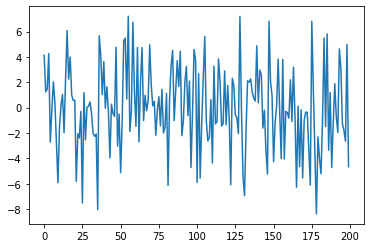

In [29]:
plt.plot(model.resid);

-8'e kadar inen veya 7'ye kadar çıkan hatalar var buna neden olan gözlem değerlerine gidip odaklanmak gerekir.